In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
data_bc=load_breast_cancer()

In [3]:
X=pd.DataFrame(data_bc['data'], columns=data_bc['feature_names'])
Y=pd.DataFrame(data_bc['target'])

In [4]:
X=X.values
Y=Y.values


In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3)
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [6]:
def refine_Y(Y):
    Y=np.array(Y)
    Y=np.reshape(Y,(len(Y),1))
    y_zero=np.zeros((2,len(Y)))
    for i in range(len(Y)):
        c=Y[i][0]
        y_zero[c][i]=1
    return y_zero

In [7]:
def parameter_initialize():
    a=np.random.rand(2,30)*0.01
    b=np.random.rand(2,1)
    return a,b

In [8]:
def Z(X,a,b):
    z=np.dot(X,a.T).T+b
    return z.T

In [9]:
def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a

In [10]:
def foward(X,theta,b):
    z=Z(X,theta,b)
    a=sigmoid(z)
    return a.T

In [11]:
def cost(y_pred, y_ref):
    error=-(y_ref*np.log(y_pred)+(1-y_ref)*np.log(1-y_pred))
    
    return np.sum(error)/y_ref.shape[0]

In [12]:
def Dee_Z(y_pred,Y):
    dee_z=y_pred-Y
    return dee_z

In [13]:
def Dee_parameter(X,dz):
    dee_theta=np.dot(dz,X)/X.shape[0]
    dee_b=np.sum(dz, axis=1)/X.shape[0]
    dee_b=np.reshape(dee_b,(dz.shape[0],1))
    return dee_theta.T, dee_b
    

In [14]:
def back(X,Y,y_pred):
    dz=Dee_Z(y_pred,Y)
    dee_theta, dee_b=Dee_parameter(X,dz)
    return dee_theta, dee_b

In [15]:
def update(theta, b,dee_theta, dee_b, learning_rate):
    #print(theta.shape, dee_theta.shape)
    #print(dee_theta.shape, dee_b.shape)
    theta=theta-learning_rate*dee_theta.T
    b=b-learning_rate*dee_b
    #print(dee_theta.shape, dee_b.shape)
    return theta,b

In [26]:
import matplotlib.pyplot as plt
def Logistic(X,Y):
    Y=refine_Y(Y)
    J,x=[],[]
    theta, b=parameter_initialize()
    for i in range(500):
        y_pred=foward(X,theta,b)
        error=cost(y_pred,Y)
        x.append(i)
        J.append(error)
        dee_theta, dee_b=back(X,Y,y_pred)
        theta,b=update(theta, b,dee_theta, dee_b, 0.1)
        print(error)
        plt.plot(x,J)
    return theta,b
    

302.9552381906414
233.50401983719019
194.6899161829175
170.12957206319697
152.99967691735873
140.25241377884174
130.32165160960804
122.31636268241346
115.69073365258474
110.09106005428555
105.27767040323296
101.0821365056764
97.38244131607418
94.08787702532817
91.1294933277672
88.45385092005031
86.01881711172398
83.79066401239885
81.74202110792295
79.85040224560814
78.09712735423922
76.46652077907773
74.9453068698603
73.52214843914611
72.18729015510873
70.93227997735221
69.74974929765574
68.63323770078084
67.5770519702017
66.57615161926998
65.62605515219863
64.72276266738804
63.86269145541154
63.04262201767668
62.25965251143455
61.51116006386731
60.79476772959249
60.10831611913464
59.449838920558236
58.817541687138814
58.20978338146982
57.625060258770844
57.0619917453407
56.51930802653597
55.99583910569122
55.490505133545284
55.00230783890386
54.530322916906194
54.07369325248769
53.63162287430461
53.20337154918417
52.78824993961403
52.38561525730634
51.994867354800405
51.61544520467274

<ipython-input-11-64c5560b3811>:2: RuntimeWarning: divide by zero encountered in log
  error=-(y_ref*np.log(y_pred)+(1-y_ref)*np.log(1-y_pred))
<ipython-input-11-64c5560b3811>:2: RuntimeWarning: invalid value encountered in multiply
  error=-(y_ref*np.log(y_pred)+(1-y_ref)*np.log(1-y_pred))



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


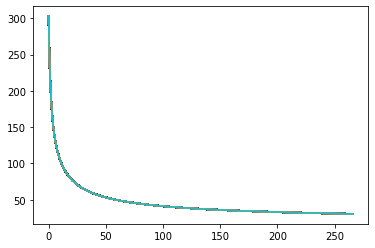

In [27]:
theta,b=Logistic(x_train,y_train)

In [28]:
def predict(X,theta,b):
    y_pred=foward(X,theta,b)
    y_pred=y_pred.T
    return y_pred.argmax(axis=1)

In [29]:
pred=predict(x_train,theta,b)

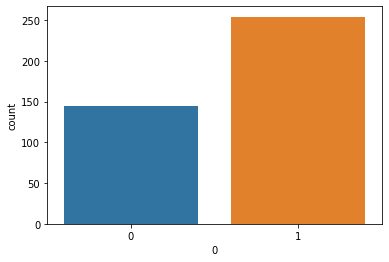

In [30]:
sb.countplot(x=0, data=pd.DataFrame(pred))

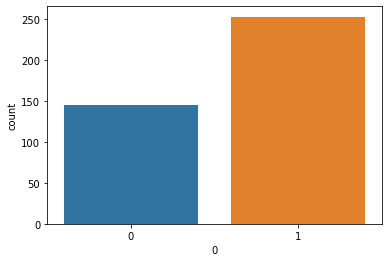

In [31]:
sb.countplot(x=0, data=pd.DataFrame(y_train))

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_train, pred)

0.9874371859296482

In [33]:
confusion_matrix(y_train,pred)

array([[142,   3],
       [  2, 251]], dtype=int64)

In [34]:
test=predict(x_test,theta,b)

In [36]:
confusion_matrix(y_test,test)
accuracy_score(y_test, test)

0.9649122807017544